KELOMPOK 3
- Quin Derbi Kusuma (1305210071)
- Dominica Febryanti (1305213010)
- Afalah Fakhri Andika Dirgantara (1305213034)

### IMPORT MODUL

In [88]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 

### INISIALISASI NILAI SAHAM EMITEN

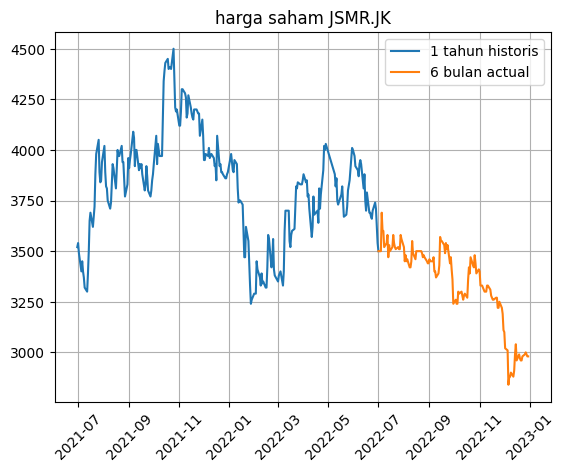

In [89]:
yjsmr = yf.Ticker("JSMR.JK")

# Plot harga saham 1 tahun yang analisi
hist = yjsmr.history(start="2021-06-30", end="2022-07-2")
# Plot harga saham 6 bulan pembanding
actual = yjsmr.history(start="2022-07-1", end="2022-12-31")

plt.title("harga saham JSMR.JK")
plt.plot(hist["Close"],label="1 tahun historis")
plt.plot(actual["Close"],label="6 bulan actual")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

### INISIALISASI CONSTANT

In [90]:
N = len(hist)
print("Hari dalam 1 tahun =", N)
SIM_H = len(actual)
print("Rentang hari yang di prediksi =",SIM_H)
M = 50
print("banyak percobaan =",M)
So = hist['Close'][-1]



Hari dalam 1 tahun = 245
Rentang hari yang di prediksi = 130
banyak percobaan = 50


### BUAT FUNGSI 

In [91]:
def simulasi(up,down,prob,parameter):
    fig, ax = plt.subplots(2, figsize=(8, 8))

    price = np.zeros((SIM_H+1, SIM_H+1), float)
    mean_si = np.zeros((SIM_H+1), float)
    mean2_si = np.zeros((SIM_H+1), float)
    mean3_si = np.zeros((SIM_H+1), float)

    price[0, 0] = So
    mean_si[0] = So
    mean2_si[0] = So
    mean3_si[0] = So


    ax[0].scatter([0], [So])

    for i in range(1,SIM_H+1):  # time step
        for j in reversed(range(i+1)):  # jumlah kenaikan
            price[j, i] = So*up**(j)*down**(i-j)
        ax[0].scatter([i for k in range(len(price[0:i+1, i]))], price[0:i+1, i])

        mean_si[i] = np.mean(price[0:i+1, i])
        listProb = np.array([math.comb(i+1, i+1-k)*prob**(i+1-k)* (1-prob)**k for k in range(i+1)])
        mean2_si[i] = np.sum(price[0:i+1, i]*listProb)
        mean3_si[i] = So*up**(i*prob)*down**(i-i*prob)

    ax[0].set_title(f"Binomial Tree {parameter}")
    ax[1].set_ybound(0, 10000)
    ax[1].plot([i for i in actual['Close']])
    ax[1].plot(mean_si, label='mean S(i)')
    ax[1].plot(mean2_si, label='mean2 S(i)')
    ax[1].plot(mean3_si, label='mean3 S(i)')
    ax[1].legend()
    plt.show()

In [92]:
def monteCarloSimulation(up,down,prob,parameter):    
    smt = []
    for k in range(M):
        s = So 
        sv=[s]
        for i in range(SIM_H):
            x=np.random.binomial(i,prob)
            s=So*up**(x)*down**(i-x)
            sv.append(s)
        smt.append(sv)  

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f'Simulasi Saham Monte Carlo dengan {parameter}')
    [ax1.plot(k) for k in smt]
    ax1.grid()

    smean = np.mean(np.array(smt),axis=0)
    ax2.set_ylim(ax1.get_ylim())
    ax2.plot(smean)
    ax2.grid()
    plt.show()

    averages = [np.mean(x) * 2 for x in smt]
    avg = np.mean(averages)
    std = np.std(averages)
    confidence_interval = [avg - 1.96 * std, avg + 1.96 * std]

    print('selang kepercayaan 95% =', confidence_interval)

    return smt,smean

In [93]:
def monteCarloSimulation2(smt,smean,parameter):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f'Simulasi Saham Monte Carlo dengan menggunakan parameter {parameter}')
    ax1.plot(hist["Close"],label="1 tahun historis")
    ax1.plot(actual["Close"],label="6 bulan actual")
    [ax1.plot(pd.Series(k[1:], index=actual.index), alpha=0.8, linestyle='--') for k in smt]
    ax1.legend()

    ax2.plot(hist["Close"],label="1 tahun historis")
    ax2.plot(actual["Close"],label="6 bulan actual")
    ax2.plot(pd.Series(smean[1:], index=actual.index),label="rata2 simulasi")
    ax2.legend()
    
    plt.grid()
    plt.show()



## PARAMETER EMPIRIS

### Mencari Nilai U,D,P

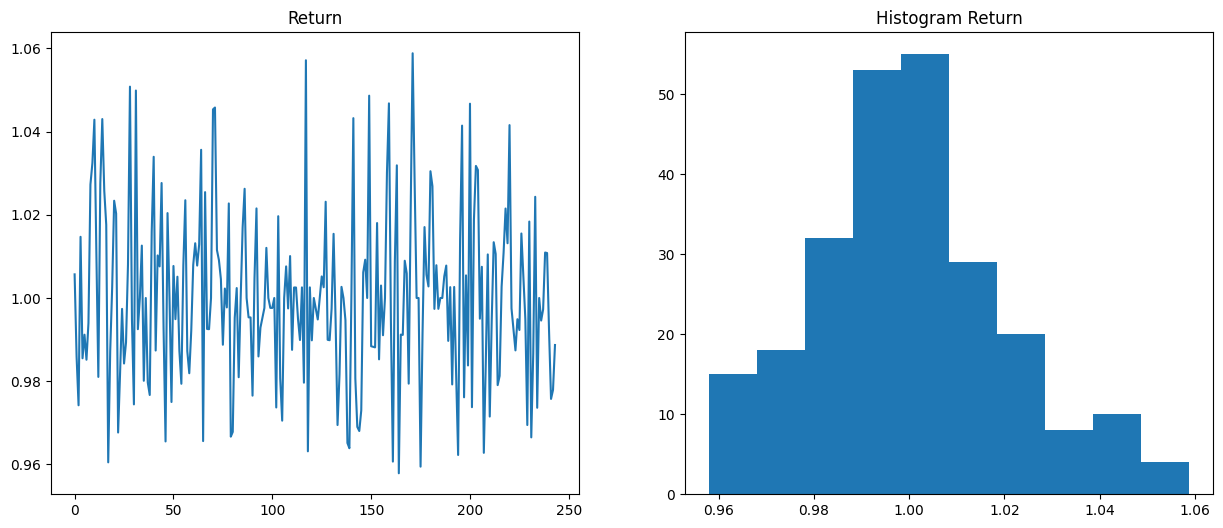

In [94]:
hist['Return'] = [hist.Close[i]/hist.Close[i-1] for i in range(1,len(hist))]+[0]

ret = np.array(hist.Return[0:int(len(hist)-1)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.plot(ret)
ax2.hist(ret, bins=10)

ax1.set_title('Return')
ax2.set_title('Histogram Return')

plt.show()

In [95]:
up_empiris = np.mean(ret[ret >= 1])
down_empiris = np.mean(ret[ret < 1])
prob_empiris = len(ret[ret >= 1])/len(ret)

print("up empiris   =",up_empiris)
print("down empiris =",down_empiris)
print("prob empiris =",prob_empiris)

up empiris   = 1.0153985953041549
down empiris = 0.9839397316518133
prob empiris = 0.5163934426229508


### Sebaran Kemungkinan Nilai harga saham

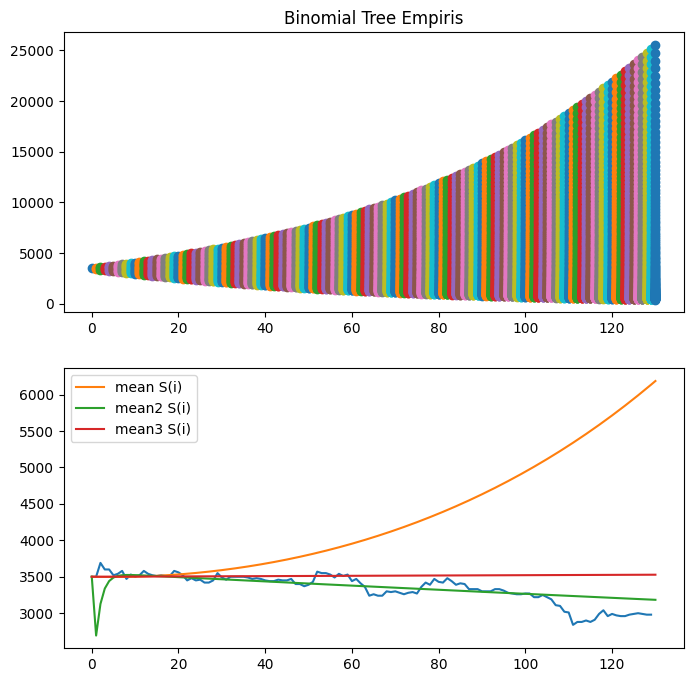

In [96]:
simulasi(up_empiris,down_empiris,prob_empiris,"Empiris")

### Simulasi Monte Carlo dengan parameter empiris

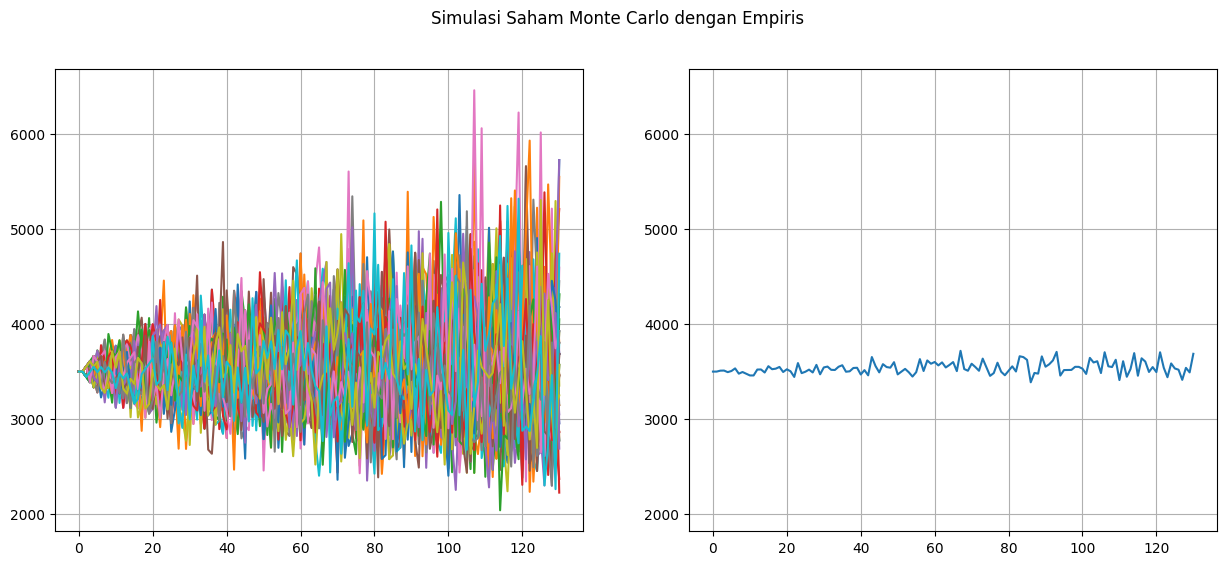

selang kepercayaan 95% = [6922.174100748398, 7230.694473540681]


In [97]:
smt_empiris,smean_empiris = monteCarloSimulation(up_empiris,down_empiris,prob_empiris,"Empiris")

#### perbandingan dengan harga saham aktual

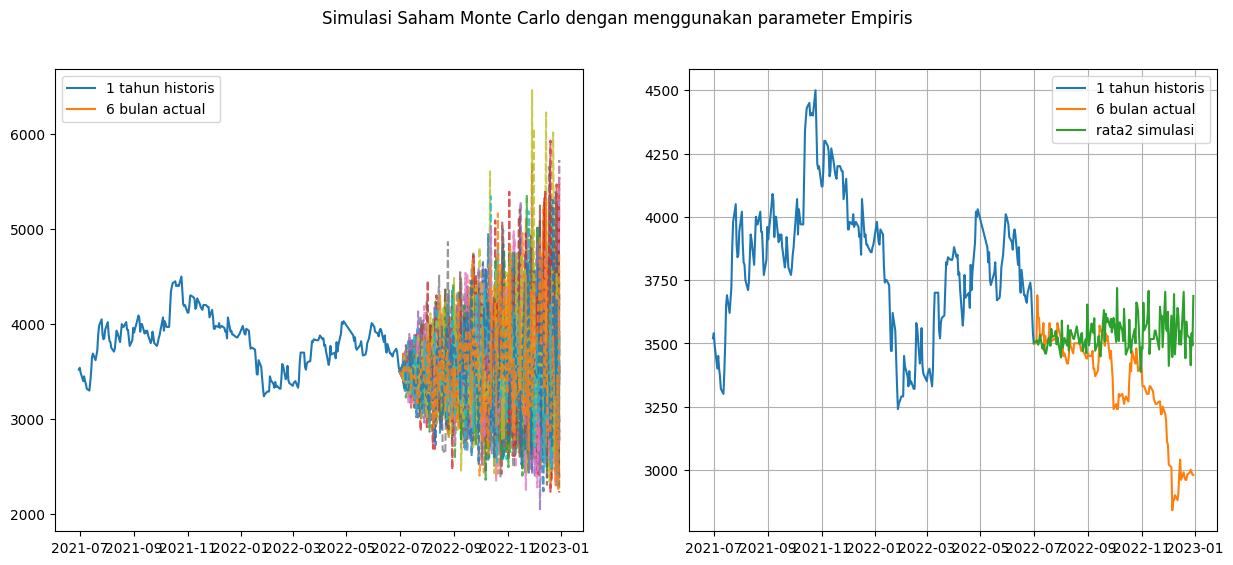

In [98]:
monteCarloSimulation2(smt_empiris,smean_empiris,"Empiris")

## PARAMETER CRR

### Mencari parameter CRR

#### nilai sigma

In [99]:
hist['logs'] = [np.log(k) for k in hist['Close']]
logs = np.array(hist['logs']) 
varLogs=np.std(logs)**2
sigEst= np.sqrt(varLogs/1)

print("sigma =",sigEst)

sigma = 0.06978393600763982


#### nilai U, D, P

In [100]:
sigma = sigEst
dt = 1/N
r = 0.055
up_crr = np.exp(sigma*np.sqrt(dt))
down_crr = 1/up_crr
prob_crr = (np.exp(r*dt)-down_crr)/(up_crr-down_crr)
print("up crr   =", up_crr)
print("down crr =", down_crr)
print("prob crr =", prob_crr)

up crr   = 1.004468285281561
down crr = 0.9955515914767697
prob crr = 0.5240645940267352


### Sebaran Kemungkinan Nilai harga saham

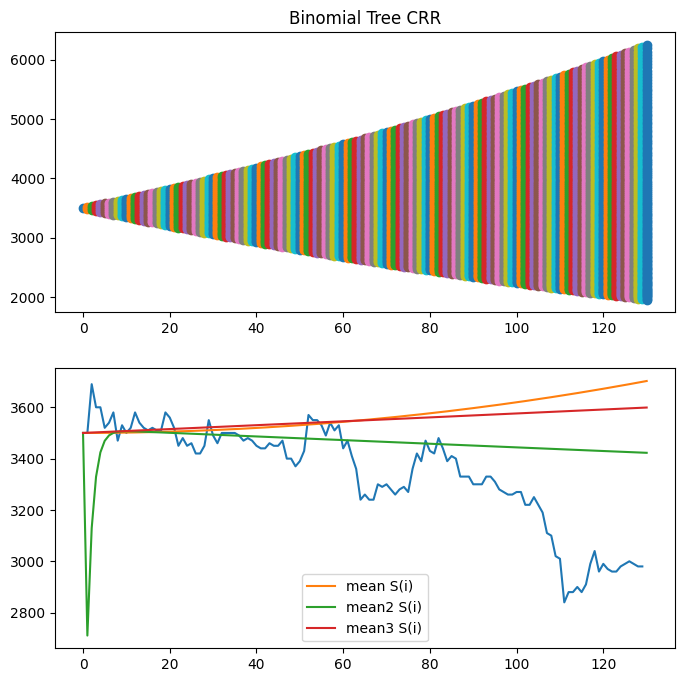

In [101]:
simulasi(up_crr,down_crr,prob_crr,"CRR")

### Simulasi Monte Carlo dengan parameter CRR

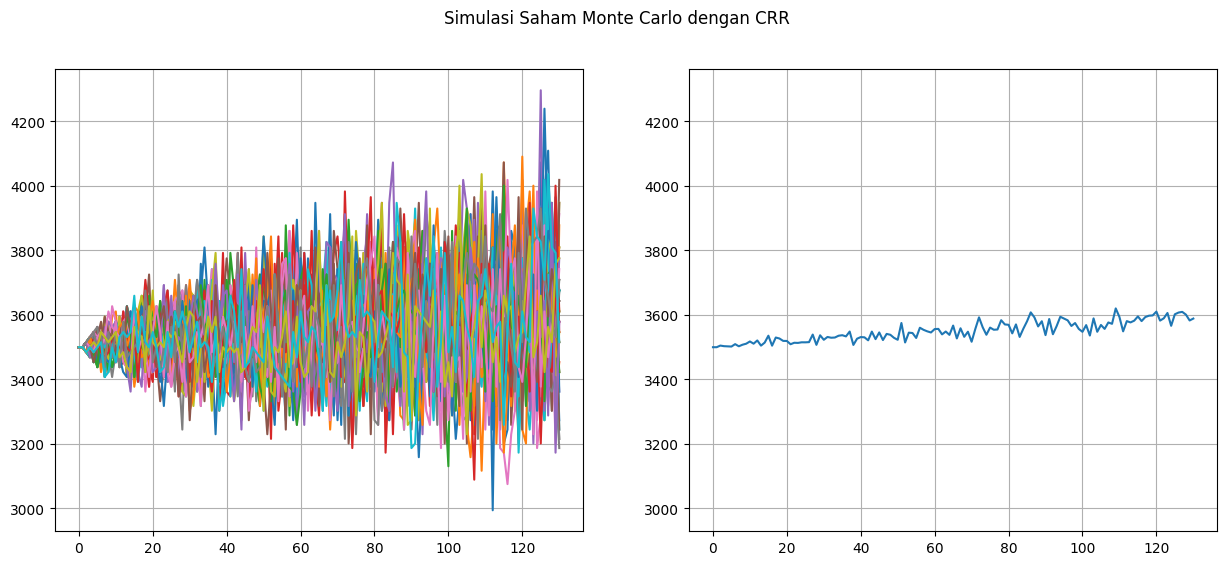

selang kepercayaan 95% = [7058.794338712418, 7140.498711172633]


In [102]:
smt_crr,smean_crr = monteCarloSimulation(up_crr,down_crr,prob_crr,"CRR")

#### perbandingan dengan harga saham aktual

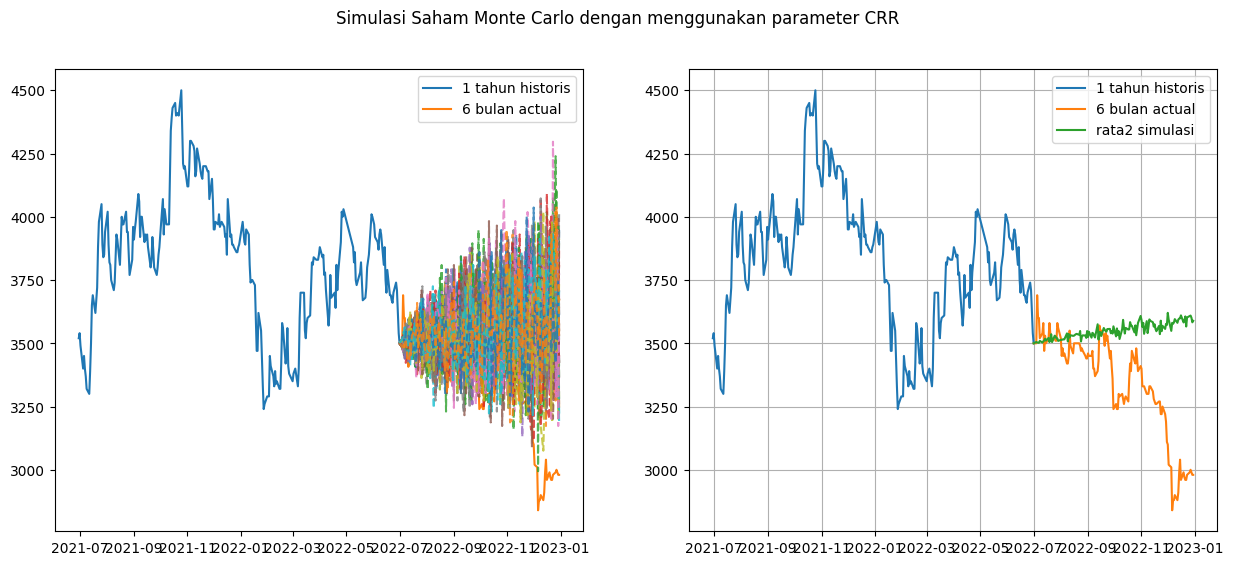

In [103]:
monteCarloSimulation2(smt_crr,smean_crr,"CRR")

## Perbandingan Monte Carlo dengan parameter empiris dan parameter CRR

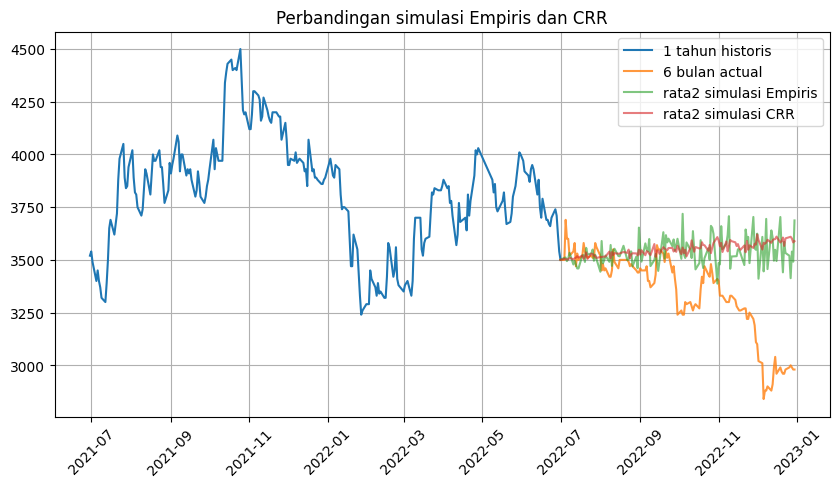

In [104]:
plt.figure().set_size_inches(10, 5, forward=True)
plt.title("Perbandingan simulasi Empiris dan CRR")
plt.plot(hist["Close"],label="1 tahun historis")
plt.plot(actual["Close"],label="6 bulan actual",alpha=0.8)
plt.plot(pd.Series(smean_empiris[1:], index=actual.index),label="rata2 simulasi Empiris",alpha=0.6)
plt.plot(pd.Series(smean_crr[1:], index=actual.index),label="rata2 simulasi CRR",alpha=0.6)
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


## NILAI Rata rata error

MSE Empiris 87882.09643783838
MAPE Empiris 6.86857784998183


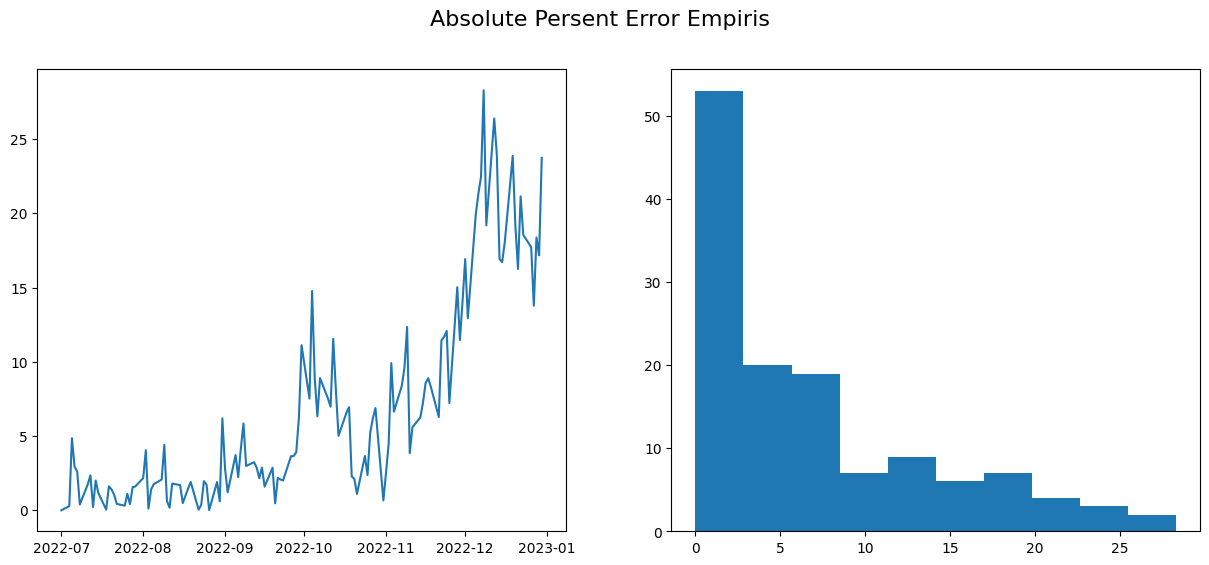

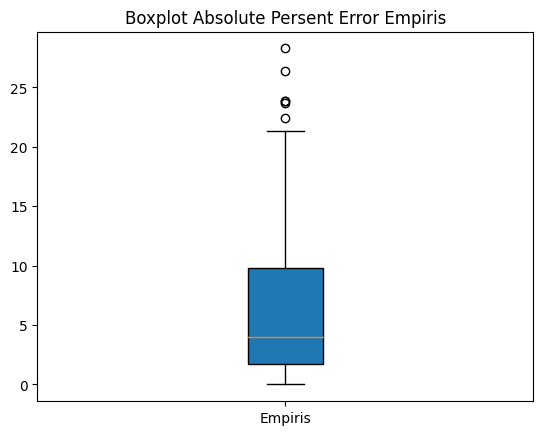

In [105]:
actual_empiris = yjsmr.history(start="2022-07-1", end="2022-12-31")
actual_empiris.drop(["Open","High","Low","Volume","Dividends","Stock Splits"],axis=1)

empiris = pd.Series(smean_empiris[1:],index=actual_empiris.index)

actual_empiris["Empiris"] = empiris

actual_empiris["Diff"] = actual_empiris["Close"] - actual_empiris["Empiris"]
actual_empiris["Squared"] = np.power(actual_empiris["Diff"],2)
actual_empiris["absolute error"] = np.abs(actual_empiris["Diff"])/ actual_empiris["Close"]*100


mse_empiris= np.sum(actual_empiris["Squared"]) / len(actual_empiris)
mape_empiris = np.sum(actual_empiris["absolute error"]) / len(actual_empiris)

print("MSE Empiris",mse_empiris)
print("MAPE Empiris",mape_empiris)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Absolute Persent Error Empiris', fontsize=16)
ax1.plot(actual_empiris["absolute error"])
ax2.hist(actual_empiris["absolute error"],bins=10)
plt.show()

plt.boxplot(actual_empiris["absolute error"],labels=["Empiris"],patch_artist=True)
plt.title("Boxplot Absolute Persent Error Empiris")
plt.show()

MSE CRR 94125.07128771818
MAPE CRR 7.071337701206252


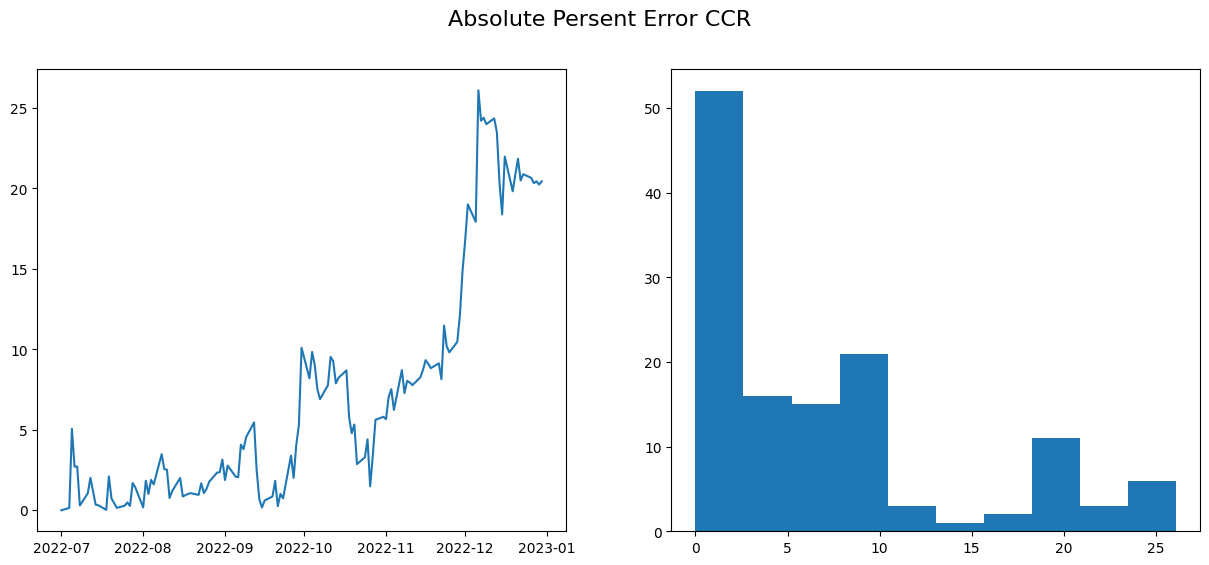

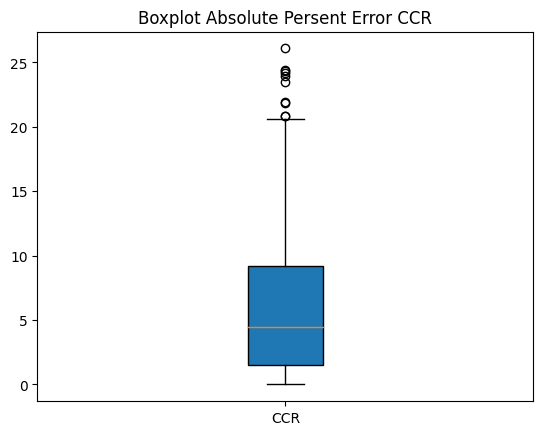

In [106]:
actual_crr = yjsmr.history(start="2022-07-1", end="2022-12-31")
actual_crr.drop(["Open","High","Low","Volume","Dividends","Stock Splits"],axis=1)

crr = pd.Series(smean_crr[1:],index=actual_crr.index)

actual_crr["Empiris"] = crr

actual_crr["Diff"] = actual_crr["Close"] - actual_crr["Empiris"]
actual_crr["Squared"] = np.power(actual_crr["Diff"],2)
actual_crr["absolute error"] = np.abs(actual_crr["Diff"])/ actual_crr["Close"]*100


mse_crr = np.sum(actual_crr["Squared"]) / len(actual_crr)
mape_crr = np.sum(actual_crr["absolute error"]) / len(actual_crr)

print("MSE CRR",mse_crr)
print("MAPE CRR",mape_crr)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Absolute Persent Error CCR', fontsize=16)
ax1.plot(actual_crr["absolute error"])
ax2.hist(actual_crr["absolute error"],bins=10)
plt.show()


plt.boxplot(actual_crr["absolute error"],labels=["CCR"],patch_artist=True)
plt.title("Boxplot Absolute Persent Error CCR")
plt.show()

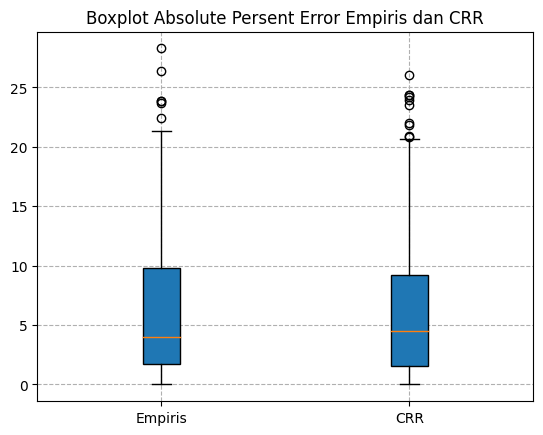

In [108]:
data = [actual_empiris["absolute error"],actual_crr["absolute error"]]
  
# Creating plot
plt.boxplot(data,patch_artist=True,labels=["Empiris","CRR"])
plt.title("Boxplot Absolute Persent Error Empiris dan CRR")
# gird x axis
plt.grid(alpha=1, linestyle='--')
plt.show()